In [18]:
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt

# %matplotlib notebook
plt.rcParams["figure.figsize"] = (9,9)

In [2]:
def cargar_ejecuciones(path):
    dfs = []
    for ejecucion in listdir(path):
        df = pd.read_csv(path + "\\" + ejecucion, sep=';')
        dfs.append(df)

    return dfs

In [3]:
def procesar_medias(dfs):
    lista = []
    for df in dfs:
        lista.append(df.iloc[-1])
    # print(list)
    df_concat = pd.DataFrame(data=lista, index=range(0, len(lista)))
    #     df_concat
    return df_concat.mean()

In [22]:
base_path = "C:\\Users\\Administrador\\Documents\\Proyecto-Salomon\\resultados\\Caso1Id1m-01-01-2019\\VNS\\Trazas\\SVNS\\slots"
sub_paths = ["0.5", "1.0", "2.0", "5.0", "10.0", "15.0", "20.0", "30.0", "40.0", "50.0"]

datos_medios_dict = {}

for sub_path in sub_paths:
    dfs = cargar_ejecuciones(base_path + "\\" + sub_path)
    datos_medios_dict[sub_path] = procesar_medias(dfs)

# presentar_datos_medios, ordenador de mejor a peor
datos_medios = pd.DataFrame(data=datos_medios_dict).transpose().sort_values(by=['fitness total'])
datos_medios

,iteracion,tiempo (ms),fitness total,fitness 1,fitness 2,fitness 3,fitness 4,tamaño,porcentajeMejora,mejor fitness,distancia
30.0,7.047910e+04,416473.200000,0.868991,0.0,0.824547,0.637500,0.512307,24.0,0.001474,0.875076,0.283889
2.0,1.617001e+06,973195.800000,0.873443,0.0,0.829983,0.654167,0.520376,24.0,0.005306,0.873443,0.306000
50.0,3.333433e+04,425552.000000,0.875275,0.0,0.832879,0.666667,0.506632,24.0,0.000000,0.875275,0.280000
20.0,1.925010e+05,507715.300000,0.876308,0.0,0.871696,0.591667,0.536662,24.0,0.002280,0.876308,0.288000
40.0,4.500100e+04,439668.666667,0.876396,0.0,0.777538,0.777778,0.496561,24.0,0.006127,0.876396,0.300000
15.0,3.900100e+04,390934.300000,0.878336,0.0,0.850714,0.645833,0.529477,24.0,0.000000,0.878336,0.288000
1.0,5.985010e+05,761977.800000,0.878664,0.0,0.832124,0.679167,0.535262,24.0,0.011344,0.878664,0.291000
5.0,3.585010e+05,589195.400000,0.878790,0.0,0.818809,0.708333,0.524355,24.0,0.006329,0.878790,0.297000
0.5,1.267001e+06,902052.400000,0.879840,0.0,0.801327,0.750000,0.516360,24.0,0.000442,0.879840,0.300000
10.0,1.290010e+05,576727.200000,0.879921,0.0,0.845606,0.666667,0.526787,24.0,0.007889,0.879921,0.291000


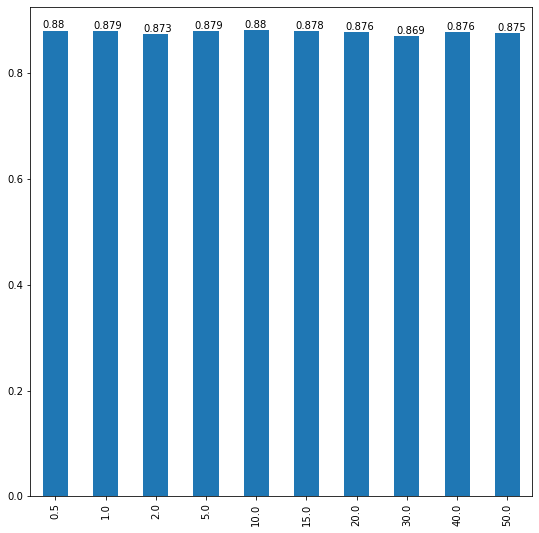

In [19]:
ax=datos_medios["fitness total"].plot.bar(y="fitness total")
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show() 


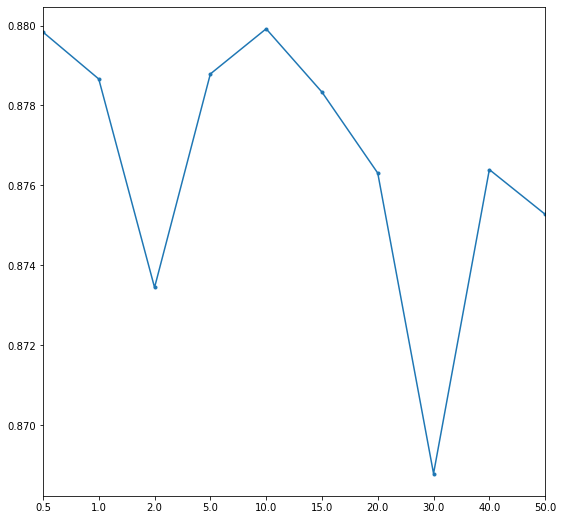

In [20]:
datos_medios["fitness total"].plot(y="fitness total", style='.-')
plt.show() 

In [ ]:
# Para presentar los datos antes de hacerse la media:
path1="C:\\Users\\Administrador\\Documents\\Proyecto-Salomon\\resultados\\Caso1Id1m-01-01-2019\\VNS\\Trazas\\SVNS\\slots\\"
path2="0.5"
for ejecucion in listdir(path1+path2):
    df = pd.read_csv(path + "\\" + ejecucion, sep=';')
    dfs.append(df)

lista = []
for df in dfs:
    lista.append(df.iloc[-1])
# print(list)
df_concat = pd.DataFrame(data=lista, index=range(0, len(lista)))
# df_concat.mean()
df_concat